In [2]:
from astropy.stats import sigma_clipped_stats
from astropy.stats import SigmaClip

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [3]:
import ccdproc as ccdp

# Import necessary packages to do aperture photometry
from photutils import aperture_photometry
import photutils

In [4]:
import pandas as pd

In [7]:
light_file_collection = ccdp.ImageFileCollection('../reduced-lights_2022_03_22/Luminance')
data = [i for i in light_file_collection.data()]

In [8]:
test = data[0]

In [9]:
mean, median, std = sigma_clipped_stats(test, sigma=2.5)

print((mean, median, std))

(281.0859198588404, 279.94032254608055, 70.43978419991676)


In [10]:
from photutils.detection import DAOStarFinder

daofind = DAOStarFinder(fwhm=8.0, threshold=8000)

sources = daofind(test)

for col in sources.colnames:

    sources[col].info.format = '%.8g'  # for consistent table output

print(sources)

 id xcentroid ycentroid sharpness  ... sky    peak      flux       mag    
--- --------- --------- ---------- ... --- --------- --------- -----------
  1  3774.847 372.37542 0.40702316 ...   0 39963.303 7.5552892  -2.1956277
  2 624.18123 1036.9664 0.45128579 ...   0 9665.5745 1.8481451 -0.66684019
  3 358.76083 1044.0283 0.41240068 ...   0 67604.516 9.0408281  -2.3905205
  4 357.18201 1045.3926 0.42431441 ...   0 66890.044 8.7184433  -2.3510974
  5 358.18091 1047.2372  0.3807047 ...   0 67501.192 8.0083037  -2.2588513
  6  4616.981   1206.52 0.37329107 ...   0 15483.071 2.8761514  -1.1470294
  7 4600.4208 1209.9879 0.45155897 ...   0 9811.7712 1.6765216 -0.56102286
  8 2308.4875 1780.9339 0.38037694 ...   0 17658.671 3.1606867  -1.2494536
  9 2152.0695 2653.4541 0.40061654 ...   0 63589.282 8.4692402  -2.3196111
 10 2149.1474 2654.5713 0.44489528 ...   0 63259.275 8.0129043  -2.2594749
 11 2151.2627 2657.4627 0.44983147 ...   0 63380.696 7.1054987  -2.1289864
 12 396.77726 3296.8538 0

In [11]:
import numpy as np

import matplotlib.pyplot as plt

from astropy.visualization import SqrtStretch

from astropy.visualization.mpl_normalize import ImageNormalize

from photutils.aperture import CircularAperture, CircularAnnulus, ApertureStats

positions = np.transpose((sources['xcentroid'], sources['ycentroid']))

apertures = CircularAperture(positions, r=4.)

norm = ImageNormalize(stretch=SqrtStretch())

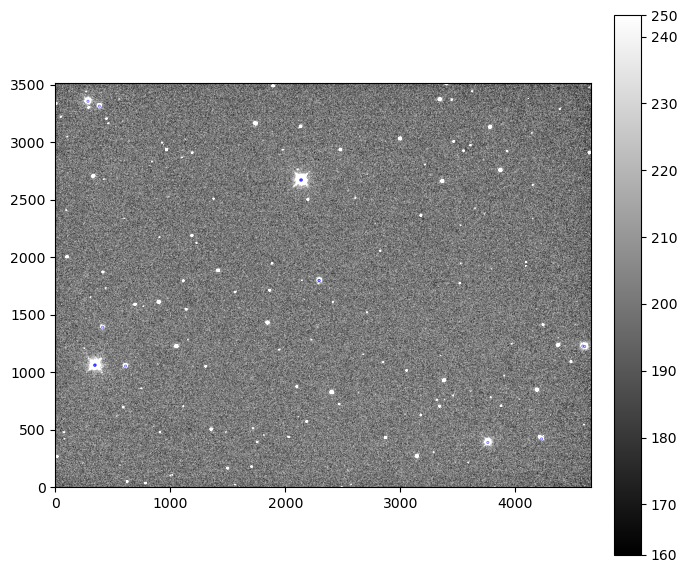

In [9]:
from convenience_functions import show_image, find_magnitude

show_image(test, cmap = 'gray')
apertures.plot(color='blue', lw=1.5, alpha=0.5);

In [10]:
from photutils.aperture import aperture_photometry

aperture_photometry(test, apertures)

id,xcenter,ycenter,aperture_sum
,pix,pix,
int64,float64,float64,float64
1,3760.9510781302442,390.79348047386173,2060793.0839457111
2,4228.214072804146,421.4107866387941,212390.558313756
3,611.4051246893503,1054.8873224373185,424064.93079238705
4,344.8971667208177,1061.206798100374,3389945.9639177797
5,342.43888996136326,1062.977150888977,3398866.321965388
6,347.982209745495,1064.6208641500464,3362385.30262349
...,...,...,...
11,2292.9457242008116,1799.2024806535699,474696.7336099833


In [11]:
def aperture_photometry_function(array):
    mean, median, std = sigma_clipped_stats(array, sigma=2.5)
    daofind = DAOStarFinder(fwhm=3.0, threshold=10000)
    sources = daofind(array - median)
    positions = np.transpose((sources['xcentroid'], sources['ycentroid']))
    apertures = CircularAperture(positions, r=4.)
    result = aperture_photometry(test, apertures)
    return result

In [12]:
test_dict = dict()
for index, array in enumerate(data):
    test_dict[index] = aperture_photometry_function(array)

In [13]:
test_dict

{0: <QTable length=9>
   id       xcenter            ycenter          aperture_sum   
              pix                pix                           
 int64      float64            float64            float64      
 ----- ------------------ ------------------ ------------------
     1 3760.8919796819146  390.4892201707358  2057006.156287268
     2  344.8899851625223 1057.3430320446053  2405774.509993118
     3 337.67026277241615 1062.8653915107793  2128434.818734395
     4 352.28980723659026 1065.2973020793333 2189704.8168405187
     5  349.7348139504464 1065.6087676528782 2994037.1151121296
     6  343.8664908272689 1066.4147619917087 3070602.3376130676
     7  2141.277277776186 2670.3780392343333 2911606.5517511014
     8 2130.4487169038102 2672.7110298363855  2760228.640686096
     9  2142.406672197283 2674.9498450687997  2808771.074720327}

In [14]:
for i in test_dict.keys():
    test_dict[i] = test_dict[i].to_pandas()

In [15]:
caca = test_dict[0].sort_values('aperture_sum', ascending = False)[:10]

In [16]:
from astroquery.astrometry_net import AstrometryNet

ast = AstrometryNet

In [17]:
from astropy.table import Table
from astroquery.astrometry_net import AstrometryNet

ast = AstrometryNet()
ast.api_key = 'vjzfuceldhqgdzxe'

wcs_header = ast.solve_from_image('../RV_Uma/Luminance/RV_Uma_Light_Luminance_16_secs_001.fits')
wcs_header

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Determining background stats
Finding sources
Found 160 sources
 id     xcentroid      ...        flux                 mag          
--- ------------------ ... ------------------ ----------------------
 58 343.86649082726893 ... 51.705582591532725      -4.28384358973718
110  2141.277277776186 ...  49.01277746667226     -4.225773284758982
 57  349.7348139504464 ...  46.37831836908986     -4.165787493772111
111 2130.4487169038102 ...  46.07248249510115     -4.158604034260799
 55 337.67025914209876 ...  45.39411098562351     -4.142498787851022
 56  352.2898103076663 ... 43.263372869842506     -4.090300936489749
113  2142.406672197283 ...  41.28458254324258      -4.03946974376117
...                ... ...                ...                    ...
  4 381.09180700691957 ... 1.0087987103259686   -0.00951129588056132
103 1191.4797072555452 ... 1.0069200155303162 -0.00748743459

KeyboardInterrupt: 

In [17]:
print('RA', wcs_header['CRVAL1'])
print('DEC', wcs_header['CRVAL2'])

RA 203.072596791
DEC 54.1004298289


In [18]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,3760.9511,390.79348,0.45777457,0.14182158,0.073374062,121,0,55498.147,9.8610765,-2.4848108
2,4228.2141,421.41079,0.57211538,0.17526879,0.074216597,121,0,6306.8859,1.028224,-0.030219321
3,611.40512,1054.8873,0.39968556,0.37138635,-0.33343467,121,0,10503.052,2.1108197,-0.81112785
4,344.89717,1061.2068,0.319585,0.1088037,-0.86898487,121,0,67302.156,8.6788964,-2.3461613
5,342.43889,1062.9772,0.32486425,0.39537287,0.30012855,121,0,67616.164,9.4379386,-2.4371929
6,347.98221,1064.6209,0.32211243,0.11262654,-0.14446209,121,0,66872.515,10.805598,-2.584122
...,...,...,...,...,...,...,...,...,...,...
10,2295.423,1798.6168,0.43936297,-0.090998833,-0.12862025,121,0,11225.086,1.8889927,-0.69057567
11,2292.9457,1799.2025,0.48546758,-0.25678622,-0.44182335,121,0,10745.817,1.8091978,-0.64371514


In [19]:
sources['xcentroid']
sources['ycentroid']

390.79348
421.41079
1054.8873
1061.2068
1062.9772
1064.6209
1224.9911
1228.5566
1392.8211
1798.6168
1799.2025


TODO

DO APERTURE PHOTOMETRY ON THE STARS OF THE FIRST IMAGE

PASS EVERYTHING TO SKY COORDINATES

RUN APERTURE PHOTOMETRY ON EVERY OTHER IMAGE USING SKY COORDINATES

In [20]:
type(positions)

numpy.ndarray

In [21]:
image_size = test.shape
x_trim = image_size[1] * 0.05
y_trim = image_size[0] * 0.05
positions = pd.DataFrame(positions, columns = ['xcenter', 'ycenter'])

In [22]:
positions = positions[(positions['xcenter'] - x_trim > 0) & (positions['xcenter'] + x_trim < image_size[1])]
positions = positions[(positions['ycenter'] - y_trim > 0) & (positions['ycenter'] + y_trim < image_size[0])]

In [23]:
positions

,xcenter,ycenter
0,3760.951078,390.793480
1,4228.214073,421.410787
2,611.405125,1054.887322
3,344.897167,1061.206798
4,342.438890,1062.977151
5,347.982210,1064.620864
8,411.942659,1392.821053
9,2295.423005,1798.616838
10,2292.945724,1799.202481
11,2138.865264,2671.309558


In [24]:
def image_trimmer(positions, array):
    image_size = array.shape
    x_trim = image_size[1] * 0.05
    y_trim = image_size[0] * 0.05
    positions = pd.DataFrame(positions, columns = ['xcenter', 'ycenter'])
    positions = positions[(positions['xcenter'] - x_trim > 0) & (positions['xcenter'] + x_trim < image_size[1])]
    positions = positions[(positions['ycenter'] - y_trim > 0) & (positions['ycenter'] + y_trim < image_size[0])]
    return positions

In [25]:
trimmed_positions = image_trimmer(positions, test)

In [26]:
def excluding_duplicates(df):
    #Taking initial comparison values from first row
    xcenter,ycenter = df.iloc[0][['xcenter','ycenter']]
    #Including first row in result
    filters = [True]

    #Skipping first row in comparisons
    for index, row in df.iloc[1:].iterrows():
        if 0.99*xcenter <= row['xcenter'] <= 1.01*xcenter and 0.99*ycenter <= row['ycenter'] <= 1.01*ycenter:
            filters.append(False)
        else:
            filters.append(True)
            # Updating values to compare based on latest accepted row
            xcenter = row['xcenter']
            ycenter = row['ycenter']

    result = df.loc[filters]
    return result.reset_index(drop = True)

In [27]:
positions = excluding_duplicates(trimmed_positions)
print(positions)

       xcenter      ycenter
0  3760.951078   390.793480
1  4228.214073   421.410787
2   611.405125  1054.887322
3   344.897167  1061.206798
4   411.942659  1392.821053
5  2295.423005  1798.616838
6  2138.865264  2671.309558
7   383.534684  3314.720245


In [28]:
aperture = CircularAperture(positions, r=8)
annulus_aperture = CircularAnnulus(positions, r_in=30, r_out=40)

In [29]:
sigclip = SigmaClip(sigma=3, maxiters=5)
aper_stats = ApertureStats(test, aperture, sigma_clip=None)
bkg_stats = ApertureStats(test, annulus_aperture, sigma_clip=sigclip)

In [30]:
bkg_median = bkg_stats.median
print(bkg_median)

[223.77995946 204.43868288 203.3413379  301.32494838 201.86052729
 207.24609458 310.56182156 203.86322098]


In [31]:
from photutils.aperture import aperture_photometry

In [32]:
phot_table = aperture_photometry(test, aperture)
for col in phot_table.colnames:
   phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter  aperture_sum
       pix       pix                
--- --------- --------- ------------
  1 3760.9511 390.79348      4511333
  2 4228.2141 421.41079    474660.44
  3 611.40512 1054.8873     947015.6
  4 344.89717 1061.2068     10857127
  5 411.94266 1392.8211     452481.9
  6  2295.423 1798.6168    1241974.4
  7 2138.8653 2671.3096     10641901
  8 383.53468 3314.7202    964067.78


In [33]:
aperture_area = aper_stats.sum_aper_area.value
print(aperture_area)

[201.06192983 201.06192983 201.06192983 201.06192983 201.06192983
 201.06192983 201.06192983 201.06192983]


In [34]:
total_bkg = bkg_median * aperture_area
phot_bkgsub = phot_table['aperture_sum'] - total_bkg

In [35]:
phot_table['total_bkg'] = total_bkg
phot_table['aperture_sum_bkgsub'] = phot_bkgsub
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'
print(phot_table)

 id  xcenter   ycenter  aperture_sum total_bkg aperture_sum_bkgsub
       pix       pix                                              
--- --------- --------- ------------ --------- -------------------
  1 3760.9511 390.79348      4511333 44993.631           4466339.4
  2 4228.2141 421.41079    474660.44 41104.836           433555.61
  3 611.40512 1054.8873     947015.6 40884.202            906131.4
  4 344.89717 1061.2068     10857127 60584.976            10796542
  5 411.94266 1392.8211     452481.9 40586.467           411895.43
  6  2295.423 1798.6168    1241974.4   41669.3           1200305.1
  7 2138.8653 2671.3096     10641901 62442.159            10579459
  8 383.53468 3314.7202    964067.78 40989.133           923078.65


In [36]:
gain = 1
exptime = 16
C = 0

In [37]:
flux = (gain * phot_bkgsub)/exptime
print(flux)

aperture_sum
------------
   279146.21
   27097.226
   56633.213
   674783.85
   25743.465
    75019.07
   661216.17
   57692.415


In [38]:
mag = C - 2.5*np.log10(flux)
print(mag)

aperture_sum
------------
  -13.614579
  -11.082312
  -11.882678
  -14.572912
  -11.026667
  -12.187929
  -14.550859
  -11.902797


In [112]:
def aperture_correction_v1(data, positions, r_start, r_end, step_size, r_inner_annulus, r_outer_annulus, exp_time, gain, C):
    apertures = CircularAperture(positions, r_start)
    annulus_aperture = CircularAnnulus(positions, r_in = r_inner_annulus, r_out = r_outer_annulus)
    phot_table = aperture_photometry(data, apertures)
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output
    #print(phot_table)
    sigclip = SigmaClip(sigma=3, maxiters=5)
    aper_stats = ApertureStats(data, apertures, sigma_clip=None)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    bkg_median = bkg_stats.median
    #print(bkg_median)
    aperture_area_r_start = aper_stats.sum_aper_area.value
    total_bkg = bkg_median * aperture_area_r_start
    phot_bkgsub_r_start = phot_table['aperture_sum'] - total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub_r_start
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output
    #print(phot_table)
    flux_r_start = (gain * phot_bkgsub_r_start) / exp_time
    mag_r_start = C - 2.5 * np.log10(flux_r_start)
    phot_table['flux'] = flux_r_start
    phot_table['mag'] = mag_r_start
    phot_table['delta_mag'] = 0
    for col in phot_table.colnames:
        phot_table[col].info.format = '%.8g'  # for consistent table output
    #print(phot_table)
    plt.scatter(r_start, 0, color = 'k')
    for r in np.arange(r_start + step_size, r_end + step_size, step_size):
        apertures = CircularAperture(positions, r)
        phot_table = aperture_photometry(data, apertures)
        for col in phot_table.colnames:
            phot_table[col].info.format = '%.8g'  # for consistent table output
        #print(phot_table)
        aper_stats = ApertureStats(data, apertures, sigma_clip=None)
        aperture_area = aper_stats.sum_aper_area.value
        total_bkg = bkg_median * aperture_area
        phot_bkgsub = phot_table['aperture_sum'] - total_bkg
        phot_table['aperture_sum_bkgsub'] = phot_bkgsub
        for col in phot_table.colnames:
            phot_table[col].info.format = '%.8g'  # for consistent table output
        #print(phot_table)
        flux = (gain * phot_bkgsub) / exp_time
        mag = C - 2.5 * np.log10(flux)
        phot_table['flux'] = flux
        phot_table['mag'] = mag
        delta_mag = mag_r_start - mag
        phot_table['delta_mag'] = delta_mag
        for col in phot_table.colnames:
            phot_table[col].info.format = '%.8g'  # for consistent table output
        #print(phot_table)
        plt.scatter(r, delta_mag[0], color = 'k')
        plt.scatter(r, delta_mag[1], color = 'r')
        plt.scatter(r, delta_mag[2], color = 'g')
        plt.scatter(r, delta_mag[3], color = 'b')
        plt.scatter(r, delta_mag[4], color = 'c')
        plt.scatter(r, delta_mag[5], color = 'm')
        plt.scatter(r, delta_mag[6], color = 'y')
        plt.scatter(r, delta_mag[7], color = 'grey')
    plt.show()

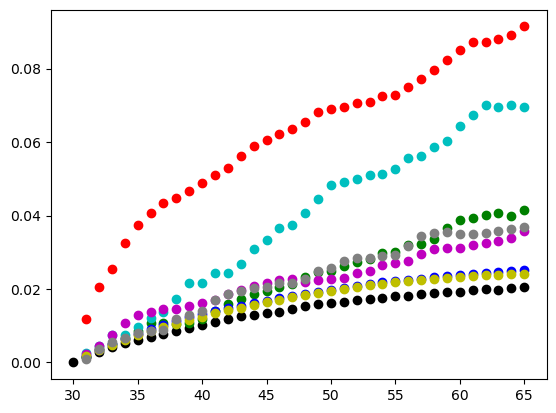

CPU times: user 2.98 s, sys: 132 ms, total: 3.11 s
Wall time: 3.18 s


In [113]:
%%time
aperture_correction_v1(test, positions, 30, 65, 1, 65, 75, 16, 1, 0)

In [117]:
def aperture_correction_v2(data, positions, r_start, r_end, step_size, r_in, r_out, exp_time, gain, C, tolerance):
    annulus_aperture = CircularAnnulus(positions, r_in = r_in, r_out = r_out)
    sigclip = SigmaClip(sigma=3, maxiters=5)
    bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
    bkg_median = bkg_stats.median
    #print(bkg_median)
    aperture_radius = []
    mag1 = []
    mag2 = []
    mag3 = []
    mag4 = []
    mag5 = []
    mag6 = []
    mag7 = []
    mag8 = []
    for r in np.arange(r_start, r_end + step_size, step_size):
        apertures = CircularAperture(positions, r)
        phot_table = aperture_photometry(data, apertures)
        aper_stats = ApertureStats(data, apertures, sigma_clip=None)
        aperture_area = aper_stats.sum_aper_area.value
        total_bkg = bkg_median * aperture_area
        #print(total_bkg)
        phot_bkgsub = phot_table['aperture_sum'] - total_bkg
        phot_table['aperture_sum_bkgsub'] = phot_bkgsub
        flux = (gain * phot_bkgsub) / exp_time
        mag = C - 2.5 * np.log10(flux)
        phot_table['flux'] = flux
        phot_table['mag'] = mag
        aperture_radius.append(r)
        mag1.append(mag[0])
        mag2.append(mag[1])
        mag3.append(mag[2])
        mag4.append(mag[3])
        mag5.append(mag[4])
        mag6.append(mag[5])
        mag7.append(mag[6])
        mag8.append(mag[7])
        for col in phot_table.colnames:
            phot_table[col].info.format = '%.8g'  # for consistent table output
        #print(phot_table)
    delta_mag1 = []
    delta_mag2 = []
    delta_mag3 = []
    delta_mag4 = []
    delta_mag5 = []
    delta_mag6 = []
    delta_mag7 = []
    delta_mag8 = []
    for i in range(0, int(((r_end - r_start) / step_size) + 1)):
        delta_mag1.append(mag1[0] - mag1[i])
        delta_mag2.append(mag2[0] - mag2[i])
        delta_mag3.append(mag3[0] - mag3[i])
        delta_mag4.append(mag4[0] - mag4[i])
        delta_mag5.append(mag5[0] - mag5[i])
        delta_mag6.append(mag6[0] - mag6[i])
        delta_mag7.append(mag7[0] - mag7[i])
        delta_mag8.append(mag8[0] - mag8[i])
    plt.scatter(aperture_radius, delta_mag1, color = 'k', label = 'Star 1')
    plt.scatter(aperture_radius, delta_mag2, color = 'r', label = 'Star 2')
    plt.scatter(aperture_radius, delta_mag3, color = 'g', label = 'Star 3')
    plt.scatter(aperture_radius, delta_mag4, color = 'b', label = 'Star 4')
    plt.scatter(aperture_radius, delta_mag5, color = 'c', label = 'Star 5')
    plt.scatter(aperture_radius, delta_mag6, color = 'm', label = 'Star 6')
    plt.scatter(aperture_radius, delta_mag7, color = 'y', label = 'Star 7')
    plt.scatter(aperture_radius, delta_mag8, color = 'grey', label = 'Star 8')
    plt.xlabel('r')
    plt.ylabel('\u0394m')
    plt.legend(loc="upper left")
    plt.show()
    #print(delta_mag1)
    correction1 = []
    correction2 = []
    correction3 = []
    correction4 = []
    correction5 = []
    correction6 = []
    correction7 = []
    correction8 = []
    for i in range(0, int((r_end - r_start) / step_size)):
        if (mag1[i] - mag1[i + 1]) < tolerance:
            correction1.append(delta_mag1[i])
            #print(i)
        if (mag2[i] - mag2[i + 1]) < tolerance:
            correction2.append(delta_mag2[i])
            #print(i)
        if (mag3[i] - mag3[i + 1]) < tolerance:
            correction3.append(delta_mag3[i])
            #print(i)
        if (mag4[i] - mag4[i + 1]) < tolerance:
            correction4.append(delta_mag4[i])
            #print(i)
        if (mag5[i] - mag5[i + 1]) < tolerance:
            correction5.append(delta_mag5[i])
            #print(i)
        if (mag6[i] - mag6[i + 1]) < tolerance:
            correction6.append(delta_mag6[i])
            #print(i)
        if (mag7[i] - mag7[i + 1]) < tolerance:
            correction7.append(delta_mag7[i])
            #print(i)
        if (mag8[i] - mag8[i + 1]) < tolerance:
            correction8.append(delta_mag8[i])
            #print(i)
    corrected_mag1 = mag1[0] - correction1[0]
    corrected_mag2 = mag2[0] - correction2[0]
    corrected_mag3 = mag3[0] - correction3[0]
    corrected_mag4 = mag4[0] - correction4[0]
    corrected_mag5 = mag5[0] - correction5[0]
    corrected_mag6 = mag6[0] - correction6[0]
    corrected_mag7 = mag7[0] - correction7[0]
    corrected_mag8 = mag8[0] - correction8[0]
    return corrected_mag1, corrected_mag2, corrected_mag3, corrected_mag4, corrected_mag5, corrected_mag6, corrected_mag7, corrected_mag8

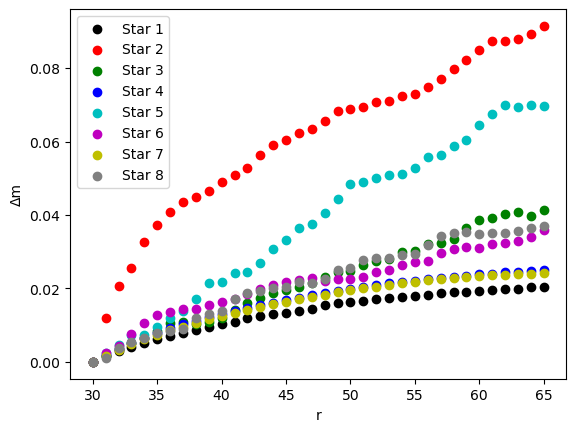

CPU times: user 747 ms, sys: 113 ms, total: 860 ms
Wall time: 894 ms


(-13.923815253599845,
 -11.861134524888557,
 -12.202433210647568,
 -15.08639478261536,
 -11.374606672722026,
 -12.565999021126231,
 -15.191679126191373,
 -12.258926116012159)

In [118]:
%%time
aperture_correction_v2(test, positions, 30, 65, 1, 65, 75, 16, 1, 0, 0.001)

In [170]:
def annulus(data, positions, r_in_start, r_out_start, r_in_final, step_size):
    r_out = r_out_start
    sigclip = SigmaClip(sigma=3, maxiters=5)
    r_annulus_in = []
    bkg_median_1 = []
    bkg_median_2 = []
    bkg_median_3 = []
    bkg_median_4 = []
    bkg_median_5 = []
    bkg_median_6 = []
    bkg_median_7 = []
    bkg_median_8 = []
    for r_in in np.arange(r_in_start, r_in_final + step_size, step_size):
        annulus_aperture = CircularAnnulus(positions, r_in = r_in, r_out = r_out)
        bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
        bkg_median = bkg_stats.median
        r_out = r_out + step_size
        r_annulus_in.append(r_in)
        bkg_median_1.append(bkg_median[0])
        bkg_median_2.append(bkg_median[1])
        bkg_median_3.append(bkg_median[2])
        bkg_median_4.append(bkg_median[3])
        bkg_median_5.append(bkg_median[4])
        bkg_median_6.append(bkg_median[5])
        bkg_median_7.append(bkg_median[6])
        bkg_median_8.append(bkg_median[7])
    plt.scatter(r_annulus_in, bkg_median_1, color = 'k', label = 'Star 1')
    plt.scatter(r_annulus_in, bkg_median_2, color = 'r', label = 'Star 2')
    plt.scatter(r_annulus_in, bkg_median_3, color = 'g', label = 'Star 3')
    plt.scatter(r_annulus_in, bkg_median_4, color = 'b', label = 'Star 4')
    plt.scatter(r_annulus_in, bkg_median_5, color = 'c', label = 'Star 5')
    plt.scatter(r_annulus_in, bkg_median_6, color = 'm', label = 'Star 6')
    plt.scatter(r_annulus_in, bkg_median_7, color = 'y', label = 'Star 7')
    plt.scatter(r_annulus_in, bkg_median_8, color = 'grey', label = 'Star 8')
    plt.legend(loc="upper right")
    plt.xlabel('r$_{in}$')
    plt.ylabel('Median pixel count')
    plt.show()

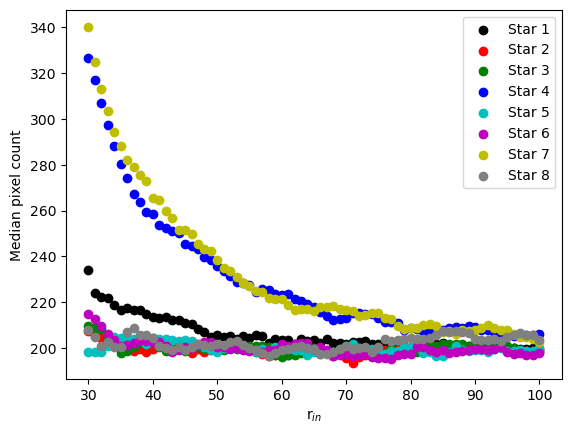

CPU times: user 1.46 s, sys: 282 ms, total: 1.74 s
Wall time: 1.78 s


In [171]:
%%time
annulus(test, positions, 30, 35, 100, 1)

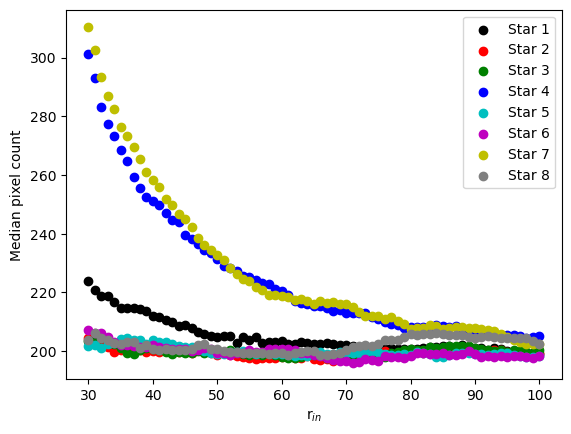

CPU times: user 1.61 s, sys: 260 ms, total: 1.87 s
Wall time: 1.91 s


In [172]:
%%time
annulus(test, positions, 30, 40, 100, 1)

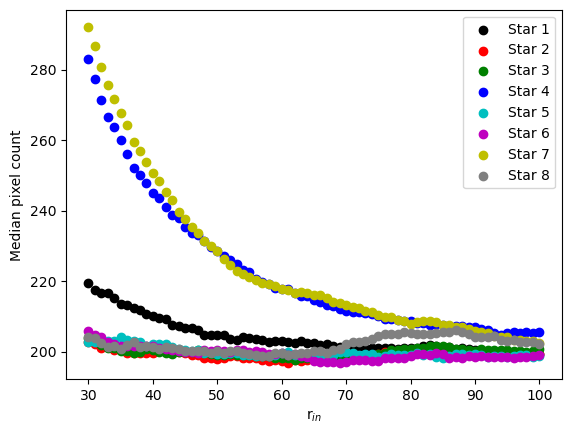

CPU times: user 1.93 s, sys: 313 ms, total: 2.24 s
Wall time: 2.46 s


In [173]:
%%time
annulus(test, positions, 30, 45, 100, 1)

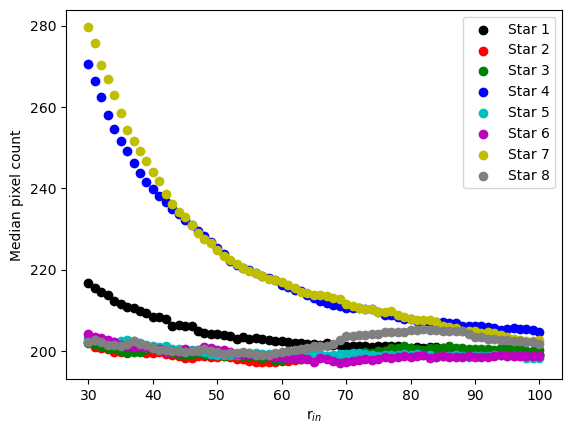

CPU times: user 2.44 s, sys: 388 ms, total: 2.83 s
Wall time: 3.03 s


In [174]:
%%time
annulus(test, positions, 30, 50, 100, 1)

In [203]:
def signal_to_noise_ratio(data, positions, r_start, r_end, step_size, delta_r):
    sigclip = SigmaClip(sigma=3, maxiters=5)
    aperture_radius = []
    signal_to_noise_ratio_1 = []
    signal_to_noise_ratio_2 = []
    signal_to_noise_ratio_3 = []
    signal_to_noise_ratio_4 = []
    signal_to_noise_ratio_5 = []
    signal_to_noise_ratio_6 = []
    signal_to_noise_ratio_7 = []
    signal_to_noise_ratio_8 = []
    for r in np.arange(r_start, r_end + step_size, step_size):
        annulus_aperture = CircularAnnulus(positions, r_in = r, r_out = r + delta_r)
        bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
        bkg_median = bkg_stats.median
        apertures = CircularAperture(positions, r)
        phot_table = aperture_photometry(data, apertures)
        aper_stats = ApertureStats(data, apertures, sigma_clip=None)
        aperture_area = aper_stats.sum_aper_area.value
        total_bkg = bkg_median * aperture_area
        signal_to_noise_ratio = phot_table['aperture_sum'] / total_bkg
        phot_table['bkg_median'] = bkg_median
        phot_table['total_bkg'] = total_bkg
        phot_table['signal_to_noise_ratio'] = signal_to_noise_ratio
        for col in phot_table.colnames:
            phot_table[col].info.format = '%.8g'  # for consistent table output
        #print(phot_table)
        aperture_radius.append(r)
        signal_to_noise_ratio_1.append(signal_to_noise_ratio[0])
        signal_to_noise_ratio_2.append(signal_to_noise_ratio[1])
        signal_to_noise_ratio_3.append(signal_to_noise_ratio[2])
        signal_to_noise_ratio_4.append(signal_to_noise_ratio[3])
        signal_to_noise_ratio_5.append(signal_to_noise_ratio[4])
        signal_to_noise_ratio_6.append(signal_to_noise_ratio[5])
        signal_to_noise_ratio_7.append(signal_to_noise_ratio[6])
        signal_to_noise_ratio_8.append(signal_to_noise_ratio[7])
    plt.scatter(aperture_radius, signal_to_noise_ratio_1, color = 'k', label = 'Star 1')
    plt.scatter(aperture_radius, signal_to_noise_ratio_2, color = 'r', label = 'Star 2')
    plt.scatter(aperture_radius, signal_to_noise_ratio_3, color = 'g', label = 'Star 3')
    plt.scatter(aperture_radius, signal_to_noise_ratio_4, color = 'b', label = 'Star 4')
    plt.scatter(aperture_radius, signal_to_noise_ratio_5, color = 'c', label = 'Star 5')
    plt.scatter(aperture_radius, signal_to_noise_ratio_6, color = 'm', label = 'Star 6')
    plt.scatter(aperture_radius, signal_to_noise_ratio_7, color = 'y', label = 'Star 7')
    plt.scatter(aperture_radius, signal_to_noise_ratio_8, color = 'grey', label = 'Star 8')
    plt.xlabel('r')
    plt.ylabel('Signal to noise ratio')
    plt.legend(loc="upper left")
    plt.show()

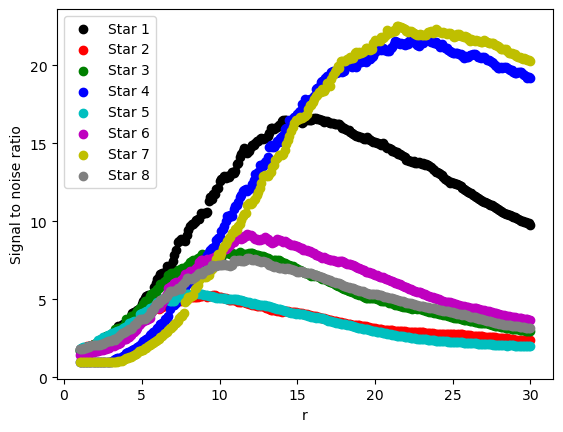

CPU times: user 3.49 s, sys: 68.7 ms, total: 3.55 s
Wall time: 3.7 s


In [204]:
%%time
signal_to_noise_ratio(test, positions, 1, 30, 0.1, 5)

In [207]:
def signal_to_noise_ratio_v2(data, positions, r_start, r_end, step_size, delta_r):
    sigclip = SigmaClip(sigma=3, maxiters=5)
    aperture_radius = []
    signal_to_noise_ratio_1 = []
    signal_to_noise_ratio_2 = []
    signal_to_noise_ratio_3 = []
    signal_to_noise_ratio_4 = []
    signal_to_noise_ratio_5 = []
    signal_to_noise_ratio_6 = []
    signal_to_noise_ratio_7 = []
    signal_to_noise_ratio_8 = []
    for r in np.arange(r_start, r_end + step_size, step_size):
        annulus_aperture = CircularAnnulus(positions, r_in = r, r_out = r + delta_r)
        bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
        bkg_median = bkg_stats.median
        apertures = CircularAperture(positions, r)
        phot_table = aperture_photometry(data, apertures)
        aper_stats = ApertureStats(data, apertures, sigma_clip=None)
        aperture_area = aper_stats.sum_aper_area.value
        total_bkg = bkg_median * aperture_area
        signal_to_noise_ratio = phot_table['aperture_sum'] / total_bkg
        phot_table['bkg_median'] = bkg_median
        phot_table['total_bkg'] = total_bkg
        phot_table['signal_to_noise_ratio'] = signal_to_noise_ratio
        aperture_radius.append(r)
        signal_to_noise_ratio_1.append(signal_to_noise_ratio[0])
        signal_to_noise_ratio_2.append(signal_to_noise_ratio[1])
        signal_to_noise_ratio_3.append(signal_to_noise_ratio[2])
        signal_to_noise_ratio_4.append(signal_to_noise_ratio[3])
        signal_to_noise_ratio_5.append(signal_to_noise_ratio[4])
        signal_to_noise_ratio_6.append(signal_to_noise_ratio[5])
        signal_to_noise_ratio_7.append(signal_to_noise_ratio[6])
        signal_to_noise_ratio_8.append(signal_to_noise_ratio[7])
    plt.scatter(aperture_radius, signal_to_noise_ratio_1, color = 'k', label = 'Star 1')
    plt.scatter(aperture_radius, signal_to_noise_ratio_2, color = 'r', label = 'Star 2')
    plt.scatter(aperture_radius, signal_to_noise_ratio_3, color = 'g', label = 'Star 3')
    plt.scatter(aperture_radius, signal_to_noise_ratio_4, color = 'b', label = 'Star 4')
    plt.scatter(aperture_radius, signal_to_noise_ratio_5, color = 'c', label = 'Star 5')
    plt.scatter(aperture_radius, signal_to_noise_ratio_6, color = 'm', label = 'Star 6')
    plt.scatter(aperture_radius, signal_to_noise_ratio_7, color = 'y', label = 'Star 7')
    plt.scatter(aperture_radius, signal_to_noise_ratio_8, color = 'grey', label = 'Star 8')
    plt.xlabel('r')
    plt.ylabel('Signal to noise ratio')
    plt.legend(loc="upper left")
    plt.show()
    maximum_signal_to_noise_ratio_1 = 0
    maximum_signal_to_noise_ratio_2 = 0
    maximum_signal_to_noise_ratio_3 = 0
    maximum_signal_to_noise_ratio_4 = 0
    maximum_signal_to_noise_ratio_5 = 0
    maximum_signal_to_noise_ratio_6 = 0
    maximum_signal_to_noise_ratio_7 = 0
    maximum_signal_to_noise_ratio_8 = 0
    optimal_radii = []
    for i in range(0, int((r_end - r_start) / step_size)):
        if signal_to_noise_ratio_1[i] >= maximum_signal_to_noise_ratio_1 and signal_to_noise_ratio_1[i] >= signal_to_noise_ratio_1[i + 1]:
            aperture_radius[i]
        if signal_to_noise_ratio_2[i] >= maximum_signal_to_noise_ratio_2:
            aperture_radius[i]
        if signal_to_noise_ratio_3[i] >= maximum_signal_to_noise_ratio_3:
            aperture_radius[i]
        if signal_to_noise_ratio_4[i] >= maximum_signal_to_noise_ratio_4:
            aperture_radius[i]
        if signal_to_noise_ratio_5[i] >= maximum_signal_to_noise_ratio_5:
            aperture_radius[i]
        if signal_to_noise_ratio_6[i] >= maximum_signal_to_noise_ratio_6:
            aperture_radius[i]
        if signal_to_noise_ratio_7[i] >= maximum_signal_to_noise_ratio_7:
            aperture_radius[i]
        if signal_to_noise_ratio_8[i] >= maximum_signal_to_noise_ratio_8:
            aperture_radius[i]
    return optimal_radii

In [33]:
import itertools
def signal_to_noise_ratio_v3(data, positions, r_start, r_end, step_size, delta_r):
    sigclip = SigmaClip(sigma=3, maxiters=5)
    # List of the aperture radius
    aperture_radius = list()

    # List of lists with the signal-to-noise ratios at each aperture
    all_snr_list = list()

    # Empty dataframe for putting everything in later
    snr_df = pd.DataFrame()

    for r in np.arange(r_start, r_end + step_size, step_size):
        annulus_aperture = CircularAnnulus(positions, r_in = r, r_out = r + delta_r)
        bkg_stats = ApertureStats(data, annulus_aperture, sigma_clip=sigclip)
        bkg_median = bkg_stats.median
        apertures = CircularAperture(positions, r)
        phot_table = aperture_photometry(data, apertures)
        aper_stats = ApertureStats(data, apertures, sigma_clip=None)
        aperture_area = aper_stats.sum_aper_area.value
        total_bkg = bkg_median * aperture_area
        signal_to_noise_ratio = phot_table['aperture_sum'] / total_bkg
        aperture_radius.append(r)
        all_snr_list.append(list(signal_to_noise_ratio))

    stars_snr = list(map(list, itertools.zip_longest(*all_snr_list, fillvalue=None)))

    # Add the aperture radii in the first column
    snr_df['Aperture radii'] = aperture_radius

    for star_index, snr_list in enumerate(stars_snr):
        snr_df[f'Star {star_index}'] = snr_list


    indexes_of_max_snr = list(snr_df.idxmax())[1:] # Exclude the first one since it's the aperture radii

    optimal_radii = [df['Aperture radii'].iloc[i] for i in test_list]
    return snr_df, optimal_radii

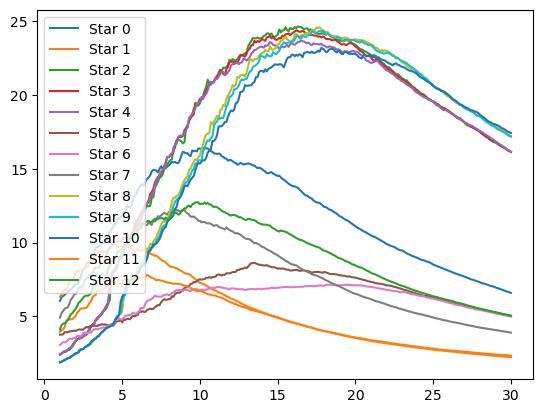

In [34]:
df, optimal_aperture_list = signal_to_noise_ratio_v3(test, positions, 1, 30, 0.1, 10)
for star_index in range(len(positions)):
    plt.plot(df['Aperture radii'], df[f'Star {star_index}'], label = f'Star {star_index}')

plt.legend()

In [29]:
test_list = list(df.idxmax())[1:]

optimal_radii = [df['Aperture radii'].iloc[i] for i in list(df.idxmax())[1:]]
optimal_radii

[10.300000000000008,
 4.5000000000000036,
 16.30000000000001,
 16.200000000000014,
 16.500000000000014,
 13.50000000000001,
 18.200000000000017,
 8.400000000000006,
 17.700000000000014,
 17.900000000000016,
 17.800000000000015,
 6.600000000000005,
 9.800000000000008]

In [35]:
optimal_aperture_list

[10.300000000000008,
 4.5000000000000036,
 16.30000000000001,
 16.200000000000014,
 16.500000000000014,
 13.50000000000001,
 18.200000000000017,
 8.400000000000006,
 17.700000000000014,
 17.900000000000016,
 17.800000000000015,
 6.600000000000005,
 9.800000000000008]

In [24]:
df

,Aperture radii,Star 0,Star 1,Star 2,Star 3,Star 4,Star 5,Star 6,Star 7,Star 8,Star 9,Star 10,Star 11,Star 12
0,1.0,6.056586,6.316088,2.392388,2.442735,2.448688,3.758012,3.067439,4.915840,1.875052,1.898409,1.898565,3.946844,4.109257
1,1.1,6.295699,6.490771,2.471931,2.482427,2.477453,3.769175,3.163810,5.241161,1.967450,1.930748,1.923520,4.091773,4.405754
2,1.2,6.375421,6.694034,2.581814,2.576430,2.577456,3.778759,3.252865,5.348368,2.009156,1.988998,1.977197,4.102837,4.514063
3,1.3,6.462459,6.780231,2.618131,2.609450,2.619001,3.929214,3.246845,5.532569,2.062088,2.078843,2.024279,4.296614,4.519847
4,1.4,6.572106,6.878876,2.645143,2.631758,2.651379,3.926974,3.253367,5.571476,2.122510,2.091544,2.095457,4.603708,4.653673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,29.6,6.743707,2.268119,16.404881,16.403778,16.451315,5.125475,5.074081,3.973689,17.491571,17.461219,17.667891,2.375332,5.127038
287,29.7,6.697111,2.258357,16.346377,16.352309,16.361630,5.107575,5.052790,3.957500,17.437110,17.361591,17.599902,2.366908,5.117010
288,29.8,6.668885,2.252999,16.260278,16.260945,16.286138,5.075975,5.029983,3.937856,17.377454,17.285491,17.530168,2.359739,5.094556
289,29.9,6.629164,2.245564,16.204408,16.225061,16.234167,5.052619,5.006731,3.921478,17.281738,17.240985,17.481656,2.351228,5.080517


In [126]:
def stars(data, positions):
    show_image(data, cmap = 'cividis')

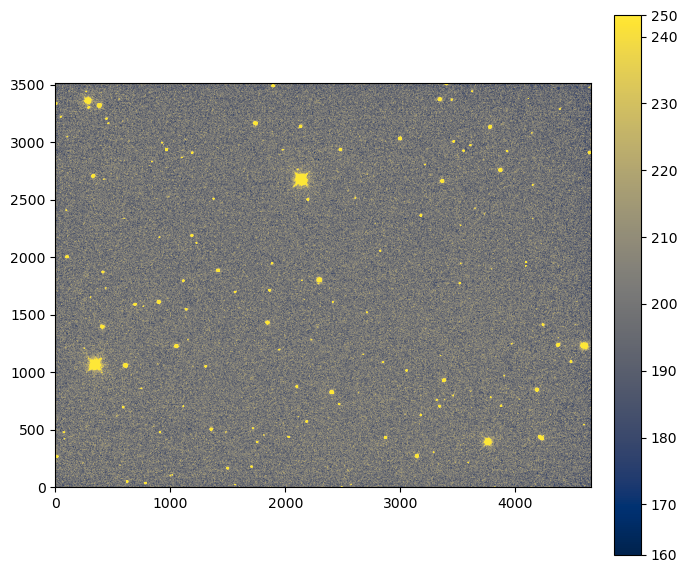

In [127]:
stars(test, positions)

In [128]:
def aperture_plotter(data, positions, r):
    show_image(data, cmap = 'cividis')
    apertures = photutils.CircularAperture(positions, r)
    apertures.plot(ec='b')

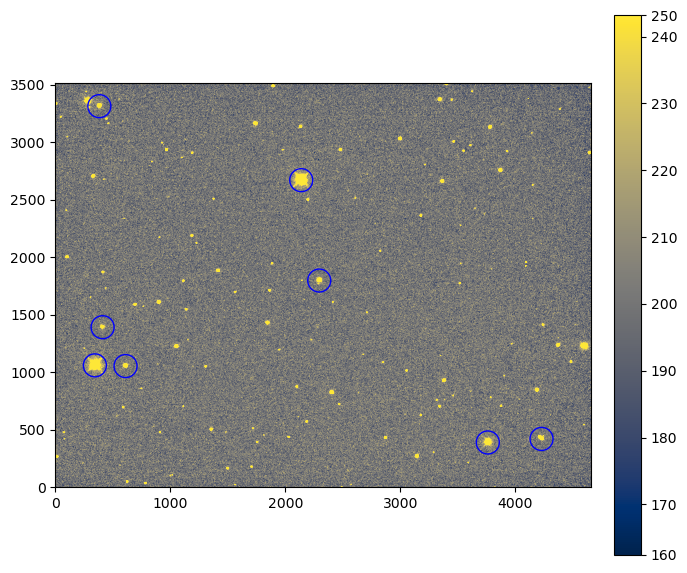

In [167]:
aperture_plotter(test, positions, 100)

In [130]:
def annulus_plotter(data, positions, r, r_in, r_out):
    show_image(data, cmap = 'cividis')
    apertures = photutils.CircularAperture(positions, r)
    apertures.plot(ec='blue')
    annulus = CircularAnnulus(positions, r_in = r_in, r_out = r_out)
    annulus.plot(ec='red')

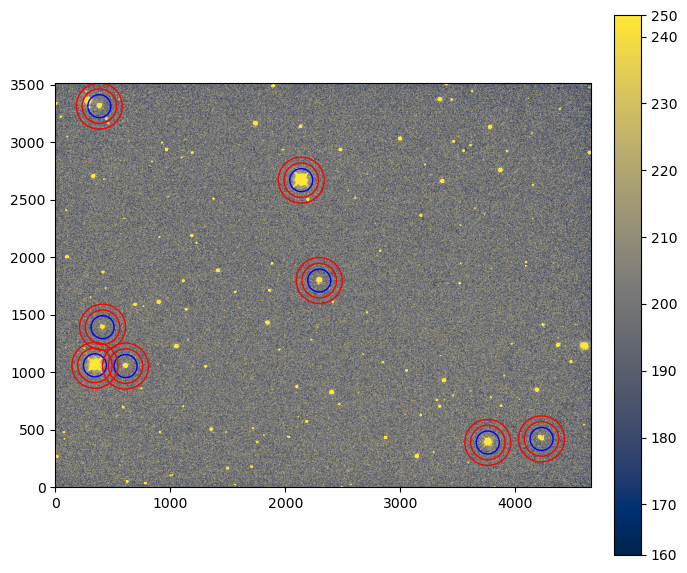

In [131]:
annulus_plotter(test, positions, 100, 150, 200)